In [1]:
import sys
if (path := "C:/Users/Tom/pycharm-projects/python-control") not in sys.path:
    sys.path.append(path)

# Frequency Response of a Feedback System
---

In [2]:
import cmath
import numpy as np
from python_control import (
    s, TransferFunction, 
    FrequencyResponse,
    LineChart
)

## Open-Loop Transfer Function

Definition of the open-loop transfer function without gain ($K = 1$).

In [3]:
G = TransferFunction(1 / ((s + 2) * (s + 4) * (s + 5)))

Create the `FrequencyResponse` object for this transfer function:

In [5]:
G_jw = FrequencyResponse(G)

## Open-Loop Gain for Marginal Stability and Range of Gain for Stability

In [6]:
K_MS, omega_MS = G_jw.marginal_stability_gain
print(f"omega_MS = {omega_MS:.3f} rad/s, K_MS = {K_MS:.3f}")

omega_MS = 6.164 rad/s, K_MS = 378.000


`omega_MS` is the angular frequency at which the closed-loop feedback system is marginally stable when the open-loop gain is equal to the value of `K_MS`.

In [7]:
K_SR = G_jw.stability_gain_range
print(f"stability range = {K_SR[0]:.3f} --> {K_SR[1]:.3f}")

stability range = 0.000 --> 378.000


`K_SR` is a tuple with the lower and upper limit of the range of gain values for which the closed-loop feedback system remains stable regardless of the angular frequency.

Select a gain value within the range for stability:

In [8]:
K_value = 200

## Gain Margin

In [9]:
GM, omega_GM = G_jw.gain_margin(K=K_value)
f = lambda _GM: 10**(_GM / 20)
print(
    f"omega_GM @ K={K_value} = {omega_GM:.3f} rad/s, "
    f"gain margin = {GM:.3f} dB ({f(GM):3f})"
)

omega_GM @ K=200 = 6.164 rad/s, gain margin = 5.529 dB (1.890000)


`omega_GM` is the angular frequency at which the phase angle of the open-loop
transfer function with given gain `K` is equal to 180°. `GM` is the factor 
in dB with which the gain `K` is to be multiplied so that the product 
`GM * K = 1`. (If we multiply `K` with `GM` in decimals, we get the gain `K_MS`
for which the closed-loop feedback system is marginally stable.)

## Phase Margin

In [10]:
PM, omega_PM = G_jw.phase_margin(K=K_value)
print(f"omega_PM @ K={K_value} = {omega_PM:.3f} rad/s, phase margin = {PM:.3f}°")

omega_PM @ K=200 = 4.507 rad/s, phase margin = 23.490°


`omega_PM` is the angular frequency at which the magnitude of the open-loop
transfer function with given gain `K` is equal to 1. `PM` is the angle in 
degrees which must be added to the phase angle of the open-loop transfer angle
to get to 180°.

## Polar Plot of the Open-Loop Frequency Response

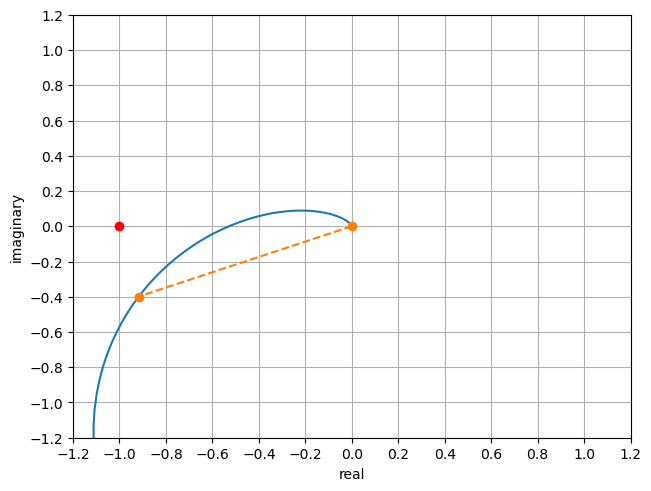

In [14]:
# Range of angular frequencies.
omega_values = np.linspace(0.01, 100, 1000)

# Frequency response values of the open-loop transfer function G.
G_jw_values = G_jw(omega_values, K=K_value)

# Coordinates of the phase margin.
PM_coords = cmath.rect(1.0, np.pi + np.radians(PM))

# Draw the plot in the complex plane.
chart = LineChart()
chart.add_xy_data(
    label='frequency response G(jw)',
    x1_values=G_jw_values.real,
    y1_values=G_jw_values.imag
)
chart.add_xy_data(
    label='-1',
    x1_values=[-1],
    y1_values=[0],
    style_props={'marker': 'o', 'color': 'red', 'linestyle': 'none'}
)
chart.add_xy_data(
    label='phase margin',
    x1_values=[0, PM_coords.real],
    y1_values=[0, PM_coords.imag],
    style_props={'marker': 'o', 'linestyle': '--'}
)
chart.x1.add_title('real')
chart.x1.scale(-1.2, 1.2, 0.2)
chart.y1.add_title('imaginary')
chart.y1.scale(-1.2, 1.2, 0.2)
chart.show()

## Bode Plot of the Open-Loop Frequency Response

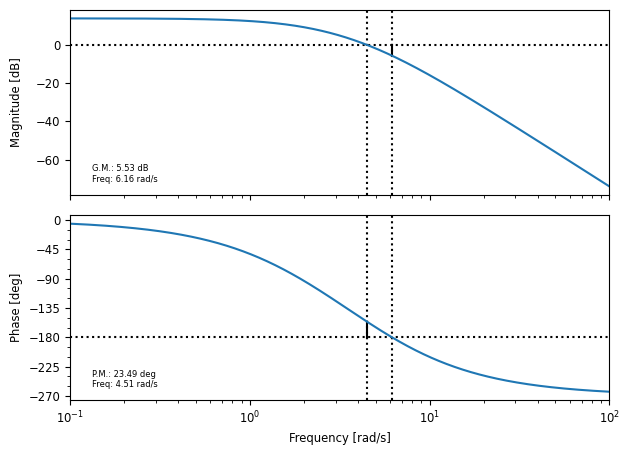

In [13]:
G_jw.bode_plot(K=K_value, display_margins='overlay', wrap_phase=False)